# Prediction of Credit Card Default

#### Goal is to predict if a person defaults on his credit card payment the following month.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Data Description :- 

There are 30000 rows and 25 columns

There are no missing values

Target is to see if the client defaults next month

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=divorced, 0=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- **default.payment.next.month: Default payment (1=yes, 0=no)




- PAY_0 to PAY_6 indicate the status of previous repayments from April to September 2005
- BILL_AMT1 to BILL_AMT_6 represent the amount of payments from April to September 2005
- PAY_AMT1 to PAY_AMT_6 represent the amounts already paid from April to September 2005

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


PAY_0 represents status of previous repayments in September 2005. We will rename this as PAY_1 as per the other attributes related to September 2005.

In [5]:
df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.rename(columns = {'default.payment.next.month':'DEFAULT'}, inplace = True)

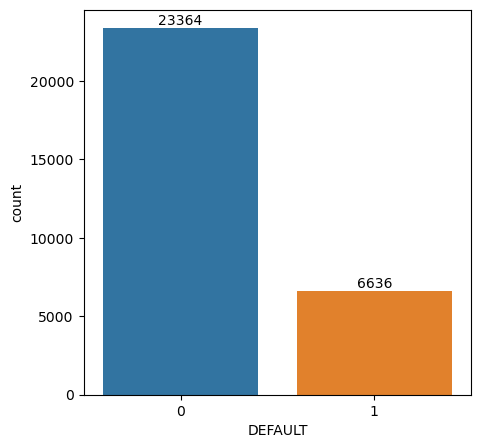

In [8]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df["DEFAULT"])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

The dataset is imabalanced. Out of 30000 records, 6636 have defaulted, i.e., 22%. The rest 23364 have not defaulted the following month.

### Exploratory Data Analysis

In [9]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- Out of all these columns, Sex, Education, Marriage and Default are categorical columns and must be classified accordingly.
- PAY_1 to PAY_6 are the number of months delay in payments. -1 indicates that amount has been paid duly. Minimum value is -2 for these variables which means the card may be unused or bill is overpaid. 

In [10]:
df["SEX"] = pd.Categorical(df["SEX"])
df["EDUCATION"] = pd.Categorical(df["EDUCATION"])
df["MARRIAGE"] = pd.Categorical(df["MARRIAGE"])
df["DEFAULT"] = pd.Categorical(df["DEFAULT"])

#### Checking for anamolies where ---

- Bill amount is greater than limit. Although it is possible to go over credit limit, we must check the volume of such transactions.
- if PAY_1 indicates -2 (no consumption/overpayment) and there is a default next month. 

In [11]:
bill = df[(df["BILL_AMT1"]>df["LIMIT_BAL"]) | (df["BILL_AMT2"]>df["LIMIT_BAL"]) | (df["BILL_AMT3"]>df["LIMIT_BAL"]) |
         (df["BILL_AMT4"]>df["LIMIT_BAL"]) | (df["BILL_AMT5"]>df["LIMIT_BAL"]) | (df["BILL_AMT6"]>df["LIMIT_BAL"])]

In [12]:
bill["DEFAULT"].value_counts()

0    2748
1    1183
Name: DEFAULT, dtype: int64

There are 3931 records where bill amount has exceeded the limit balance at least in one month. out of these, there are 1183 defaults. This means that clients are either allowed to exceed their credit limit or that fees and interest has been added because of delayed payments.

In [13]:
pay2 = df[(df["PAY_1"]==-2) & (df["PAY_2"]==-2) & (df["PAY_3"]==-2) & (df["PAY_4"]==-2) & (df["PAY_5"]==-2) & (df["PAY_6"]==-2)]

In [14]:
pay2["DEFAULT"].value_counts()

0    1825
1     284
Name: DEFAULT, dtype: int64

- There are 2109 records where all 6 months have no consumption, i.e., -2. Out of these, there are 284 records with default next month. 

- This may mean that the client has used the credit card in the current month and has defaulted payment the next month.

- Out of the total 6636 defaults, these are 284 which accounts for 4.3% of the default data. 

#### Relationship between categorical columns and default

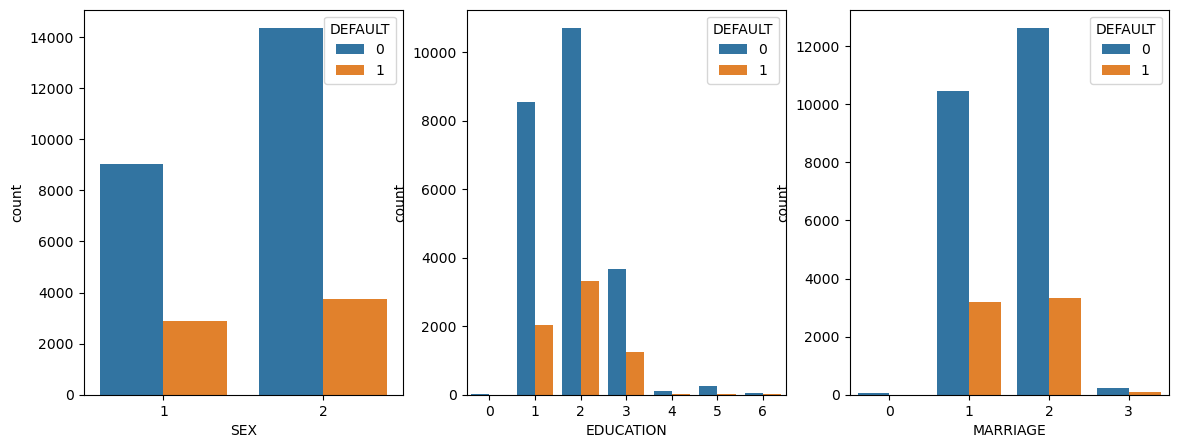

In [15]:
f,axes = plt.subplots(1,3,figsize=(14,5))
sns.countplot(x=df["SEX"], hue=df["DEFAULT"], ax=axes[0])
sns.countplot(x=df["EDUCATION"], hue=df["DEFAULT"], ax=axes[1])
sns.countplot(x=df["MARRIAGE"], hue=df["DEFAULT"], ax=axes[2])
plt.show()

In [16]:
gender = df.groupby(['SEX', 'DEFAULT']).size().unstack(1)
gender["perc"] = (gender[1]/(gender[0] + gender[1])) 
gender

DEFAULT,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


While the count of females is higher, the number of defaults are comparable to males. Hence, the percentage of defaults amongst females is lower.

The education of 0,4,5,6 categories are others or unknown. Let us all merge these into 4

In [17]:
df["EDUCATION"].replace({0:4},inplace=True)
df["EDUCATION"].replace({5:4},inplace=True)
df["EDUCATION"].replace({6:4},inplace=True)

In [18]:
edu = df.groupby(['EDUCATION', 'DEFAULT']).size().unstack(1)
edu["perc"] = (edu[1]/(edu[0] + edu[1])) 
edu

DEFAULT,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


The likelihood of default is reducing with the increase in education

In [19]:
mar = df.groupby(['MARRIAGE', 'DEFAULT']).size().unstack(1)
mar["perc"] = (mar[1]/(mar[0] + mar[1])) 
mar

DEFAULT,0,1,perc
MARRIAGE,,,
0,49,5,0.092593
1,10453,3206,0.234717
2,12623,3341,0.209283
3,239,84,0.260062


It appears that divorced people have the highest likelihood of default followed by married people.

It also appears that others column can be merged with divorced column as it has very low number and cannot be categorized as anything else.

In [20]:
df["MARRIAGE"].replace({0:3},inplace=True)

#### Checking data with further grouping

In [21]:
y = df.groupby(["SEX","MARRIAGE","DEFAULT"]).size().unstack(1)

y

MARRIAGE        1     2    3
SEX DEFAULT                 
1   0        3844  5068  103
    1        1346  1485   42
2   0        6609  7555  185
    1        1860  1856   47

Default percentages
                               
     Male - Married : 0.26                                                         Female - Married : 0.22
     Male - Single : 0.23                                                          Female - Single : 0.20
     Male - Divorced : 0.28                                                        Female - Divorced : 0.21
     

At every level, females are less likely to default than males.


In [22]:
y = df.groupby(["EDUCATION","MARRIAGE","DEFAULT"]).size().unstack(1)
y

MARRIAGE              1     2    3
EDUCATION DEFAULT                 
1         0        2953  5555   41
          1         769  1254   13
2         0        5176  5401  123
          1        1666  1619   45
3         0        2107  1457  116
          1         754   452   31
4         0         217   210    8
          1          17    16    0

Default percentages
    
    Grad - Married : 0.21       Uni - Married : 0.24          HS - Married : 0.26           Others - Married : 0.07
    Grad - Single : 0.18        Uni - Single : 0.23           HS - Single : 0.24            Others - Single : 0.07
    Grad - Divorced : 0.24      Uni - Divorced : 0.27         HS - Divorced : 0.21          Others - Divorced : 0
     
     
It turns out that the likelihood of default is reducing with the increase in level of education amongst single and married people. But it is fluctuating at similar levels amongst divorced individual and is also higher.


#### Payment statuses for the given month and default status

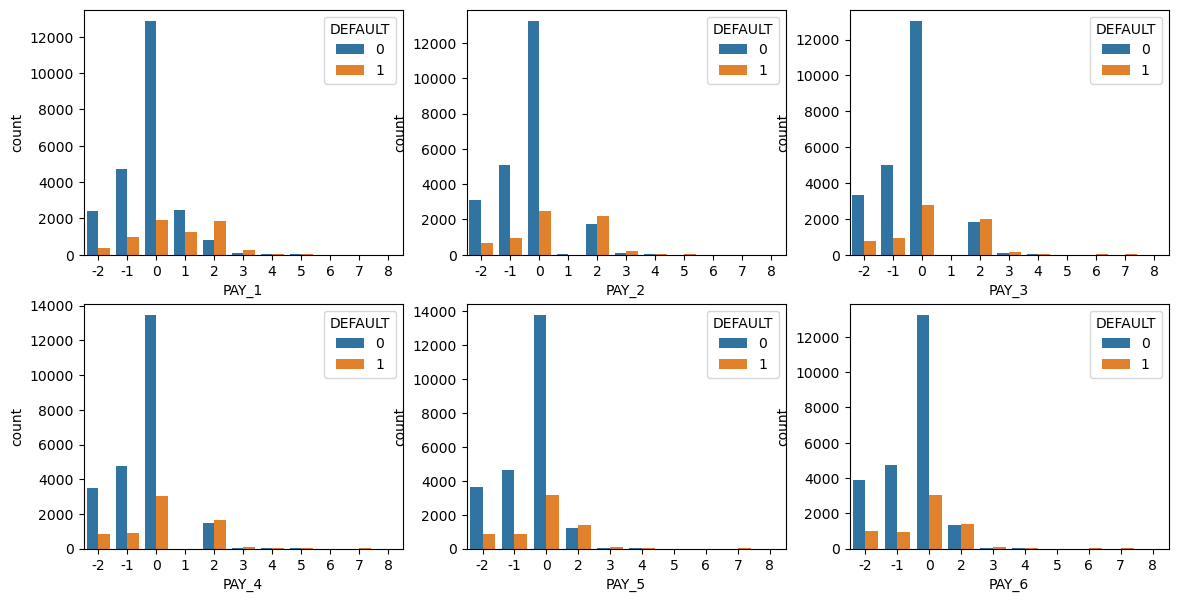

In [23]:
f,axes = plt.subplots(2,3,figsize=(14,7))
sns.countplot(x=df["PAY_1"], hue=df["DEFAULT"], ax=axes[0,0])
sns.countplot(x=df["PAY_2"], hue=df["DEFAULT"], ax=axes[0,1])
sns.countplot(x=df["PAY_3"], hue=df["DEFAULT"], ax=axes[0,2])
sns.countplot(x=df["PAY_4"], hue=df["DEFAULT"], ax=axes[1,0])
sns.countplot(x=df["PAY_5"], hue=df["DEFAULT"], ax=axes[1,1])
sns.countplot(x=df["PAY_6"], hue=df["DEFAULT"], ax=axes[1,2])
plt.show()

- It is seen that for each month from April to September, majority of payment statuses are at 0. Which means majority of the people are using their credit card as revolving credit. 

- The majority of defaults also belong to records with status 0. Next highest number of defaults belong to payment status 2. Which means the client is already 2 months behind with the repayment. 

- PAY_1 belongs to month of September. Only in this plot we can see that there are significant number of defaults even with payment status of 1. There are no defaults on payment status of 1 in any other plot of preceding months. 



#### Bill amounts and defaults

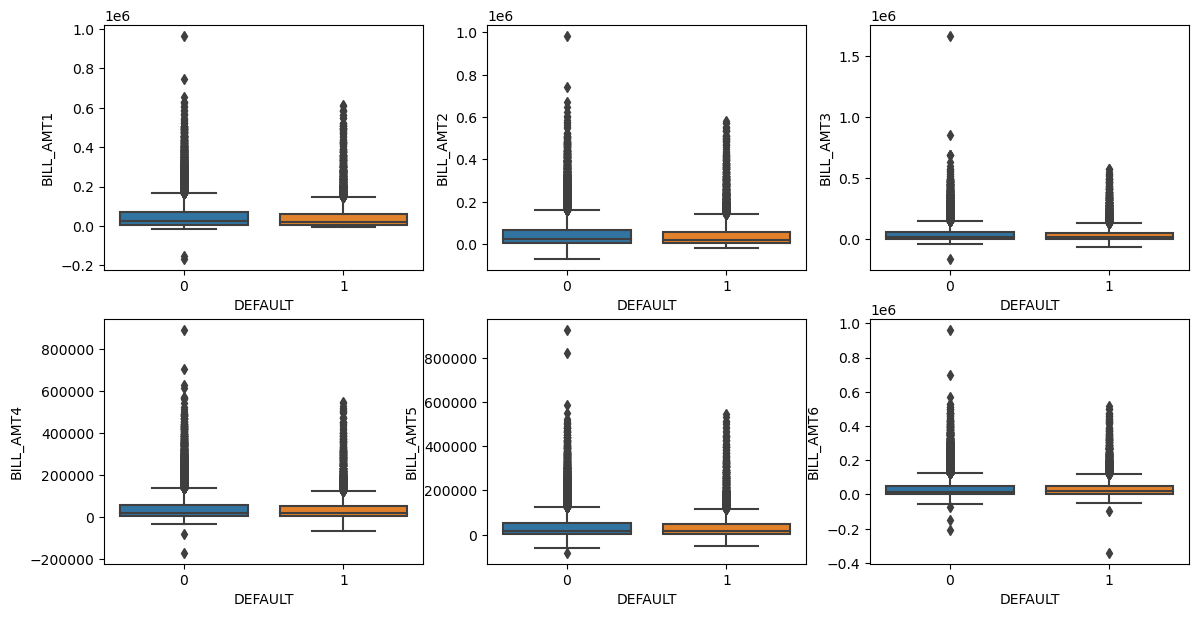

In [24]:
f,axes = plt.subplots(2,3,figsize=(14,7))
sns.boxplot(y=df["BILL_AMT1"], x=df["DEFAULT"], ax=axes[0,0])
sns.boxplot(y=df["BILL_AMT2"], x=df["DEFAULT"], ax=axes[0,1])
sns.boxplot(y=df["BILL_AMT3"], x=df["DEFAULT"], ax=axes[0,2])
sns.boxplot(y=df["BILL_AMT4"], x=df["DEFAULT"], ax=axes[1,0])
sns.boxplot(y=df["BILL_AMT5"], x=df["DEFAULT"], ax=axes[1,1])
sns.boxplot(y=df["BILL_AMT6"], x=df["DEFAULT"], ax=axes[1,2])
plt.show()

There are many outliers in bill amounts. Let us check the data after treating these outliers.

In [25]:
df1 = df.iloc[:,12:18]
df1["DEFAULT"] = df["DEFAULT"]

In [26]:
df2 = df1.iloc[:,0:6]

In [27]:
def outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    return data.clip(upper_bound, lower_bound)
for col in df2.columns:
    df1[col] = outlier(df1[col])

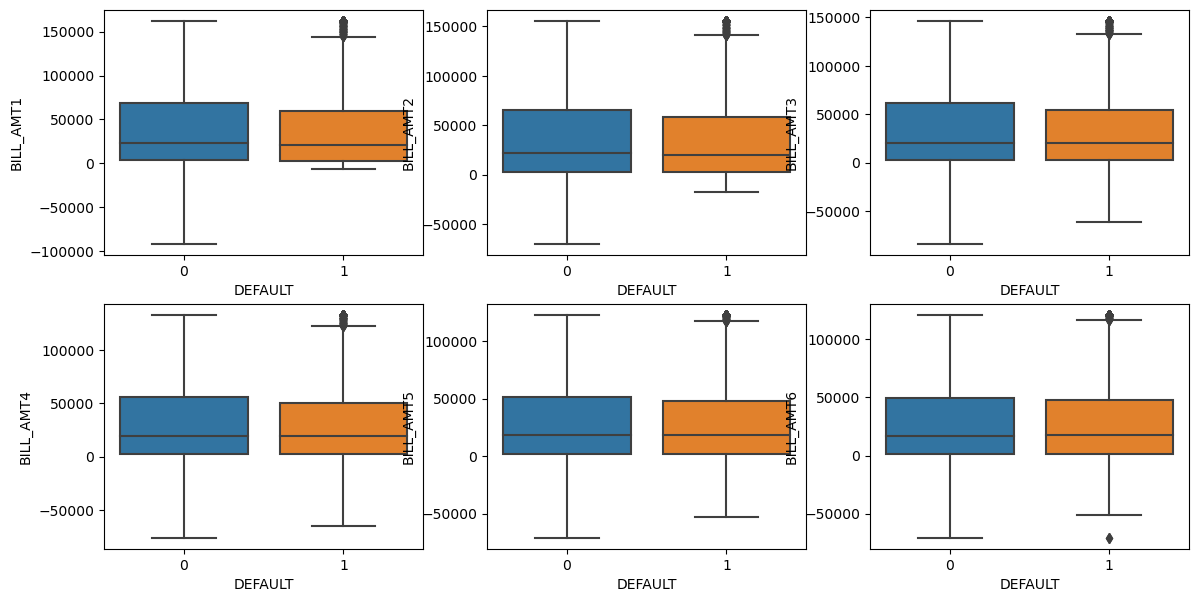

In [28]:
f,axes = plt.subplots(2,3,figsize=(14,7))
sns.boxplot(y=df1["BILL_AMT1"], x=df1["DEFAULT"], ax=axes[0,0])
sns.boxplot(y=df1["BILL_AMT2"], x=df1["DEFAULT"], ax=axes[0,1])
sns.boxplot(y=df1["BILL_AMT3"], x=df1["DEFAULT"], ax=axes[0,2])
sns.boxplot(y=df1["BILL_AMT4"], x=df1["DEFAULT"], ax=axes[1,0])
sns.boxplot(y=df1["BILL_AMT5"], x=df1["DEFAULT"], ax=axes[1,1])
sns.boxplot(y=df1["BILL_AMT6"], x=df1["DEFAULT"], ax=axes[1,2])
plt.show()

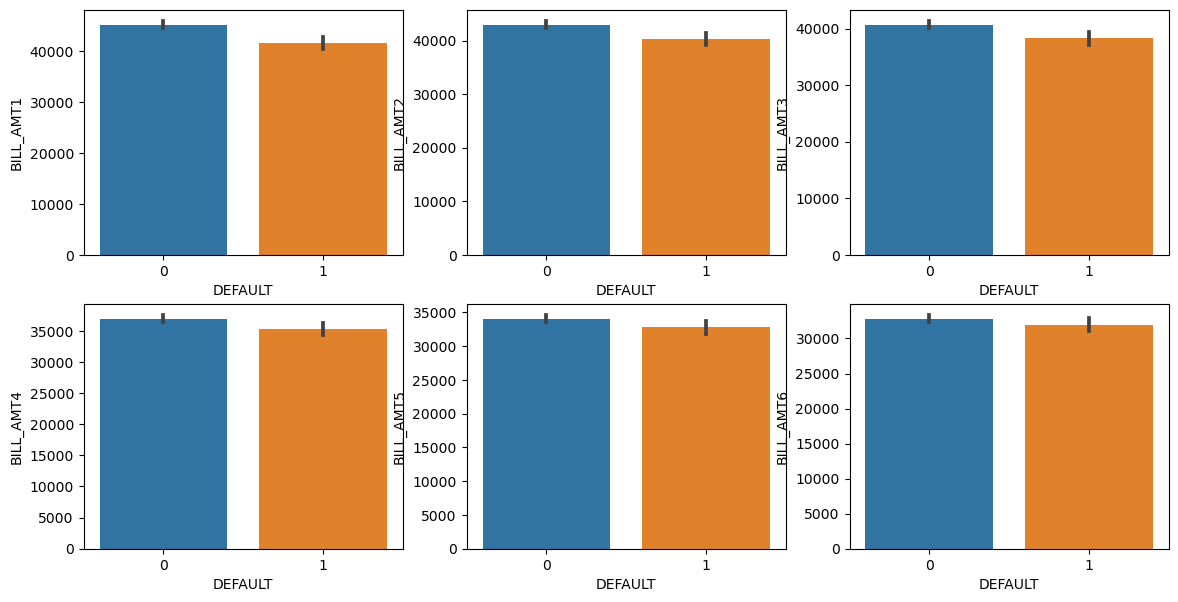

In [29]:
f,axes = plt.subplots(2,3,figsize=(14,7))
sns.barplot(y=df1["BILL_AMT1"], x=df1["DEFAULT"], ax=axes[0,0])
sns.barplot(y=df1["BILL_AMT2"], x=df1["DEFAULT"], ax=axes[0,1])
sns.barplot(y=df1["BILL_AMT3"], x=df1["DEFAULT"], ax=axes[0,2])
sns.barplot(y=df1["BILL_AMT4"], x=df1["DEFAULT"], ax=axes[1,0])
sns.barplot(y=df1["BILL_AMT5"], x=df1["DEFAULT"], ax=axes[1,1])
sns.barplot(y=df1["BILL_AMT6"], x=df1["DEFAULT"], ax=axes[1,2])
plt.show()

After treating outliers, we can see that for September, August and July, the mean bill amounts are around 40000 and for rest of the months it is around 32000.

Also there is not much variation in bill amounts in different months. There is no discernable relationship between bill amount and default.

#### Payment amounts and Defaults

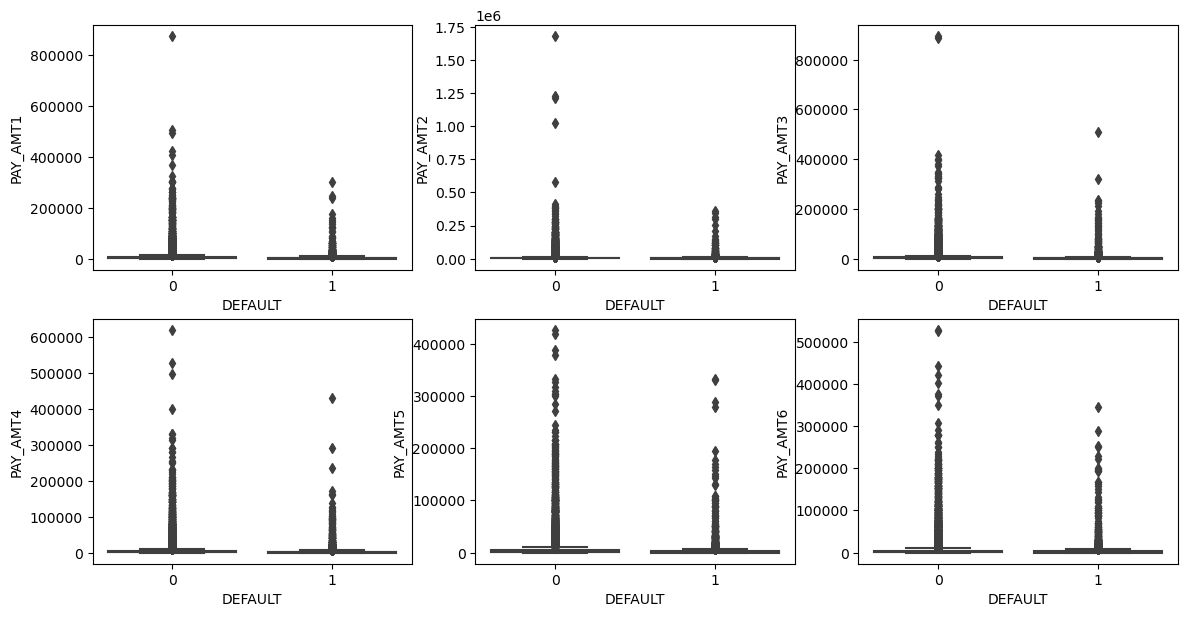

In [30]:
f,axes = plt.subplots(2,3,figsize=(14,7))
sns.boxplot(y=df["PAY_AMT1"], x=df["DEFAULT"], ax=axes[0,0])
sns.boxplot(y=df["PAY_AMT2"], x=df["DEFAULT"], ax=axes[0,1])
sns.boxplot(y=df["PAY_AMT3"], x=df["DEFAULT"], ax=axes[0,2])
sns.boxplot(y=df["PAY_AMT4"], x=df["DEFAULT"], ax=axes[1,0])
sns.boxplot(y=df["PAY_AMT5"], x=df["DEFAULT"], ax=axes[1,1])
sns.boxplot(y=df["PAY_AMT6"], x=df["DEFAULT"], ax=axes[1,2])
plt.show()

Even this data contains many outliers. Let us check after treating outliers.

In [31]:
df1 = df.iloc[:,18:25]
df1["DEFAULT"] = df["DEFAULT"]

In [32]:
df2 = df1.iloc[:,0:6]

In [33]:
def outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    return data.clip(upper_bound, lower_bound)
for col in df2.columns:
    df1[col] = outlier(df1[col])

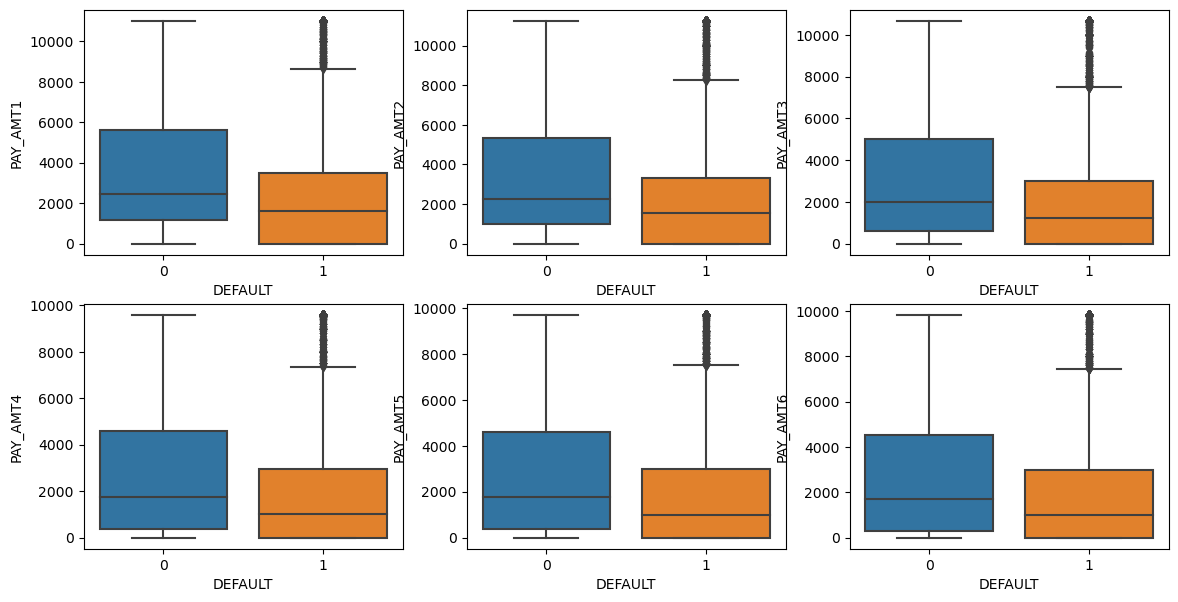

In [34]:
f,axes = plt.subplots(2,3,figsize=(14,7))
sns.boxplot(y=df1["PAY_AMT1"], x=df1["DEFAULT"], ax=axes[0,0])
sns.boxplot(y=df1["PAY_AMT2"], x=df1["DEFAULT"], ax=axes[0,1])
sns.boxplot(y=df1["PAY_AMT3"], x=df1["DEFAULT"], ax=axes[0,2])
sns.boxplot(y=df1["PAY_AMT4"], x=df1["DEFAULT"], ax=axes[1,0])
sns.boxplot(y=df1["PAY_AMT5"], x=df1["DEFAULT"], ax=axes[1,1])
sns.boxplot(y=df1["PAY_AMT6"], x=df1["DEFAULT"], ax=axes[1,2])
plt.show()

All defaults are linked to lesser amounts of repayments on average.

#### Relationship between age and default

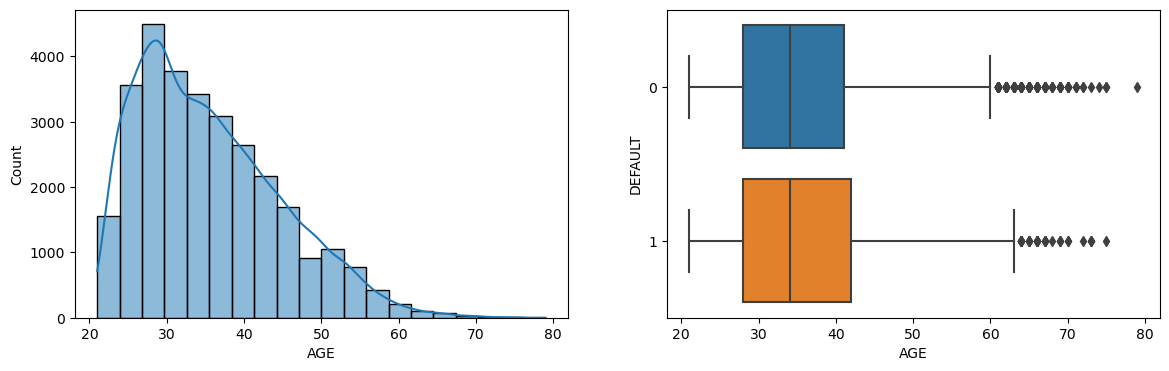

In [35]:
f, axes = plt.subplots(1,2,figsize=(14,4))
sns.histplot(x=df["AGE"], kde=True, bins=20, ax=axes[0])
sns.boxplot(x=df["AGE"], y=df["DEFAULT"], ax=axes[1])
plt.show()

The distribution of age is right skewed with the majority of the distribution between 25 and 30. The mean age value for default is around 35. There are also outliers in the age column which can be treated.

In [36]:
df1 = df[["AGE","DEFAULT"]]


In [37]:
def outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    return data.clip(upper_bound, lower_bound)

df1["AGE"] = outlier(df1["AGE"])

After treating outliers in age column,

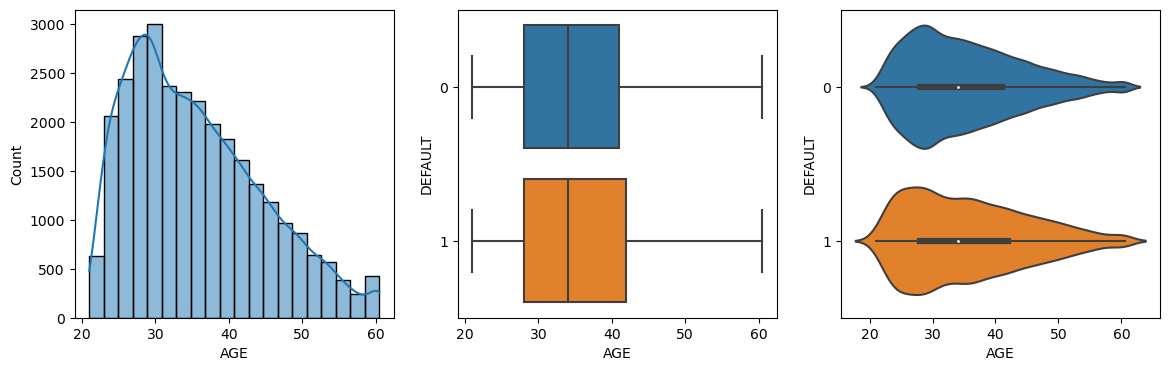

In [38]:
f, axes = plt.subplots(1,3,figsize=(14,4))
sns.histplot(x=df1["AGE"], kde=True, bins=20, ax=axes[0])
sns.boxplot(x=df1["AGE"], y=df1["DEFAULT"], ax=axes[1])
sns.violinplot(x=df1["AGE"], y=df1["DEFAULT"], ax=axes[2])
plt.show()

 The major distribution of age is between 25 and 30 whereas the mean value of default lies somewhere around 35. 

#### Relationship between limit balance and default

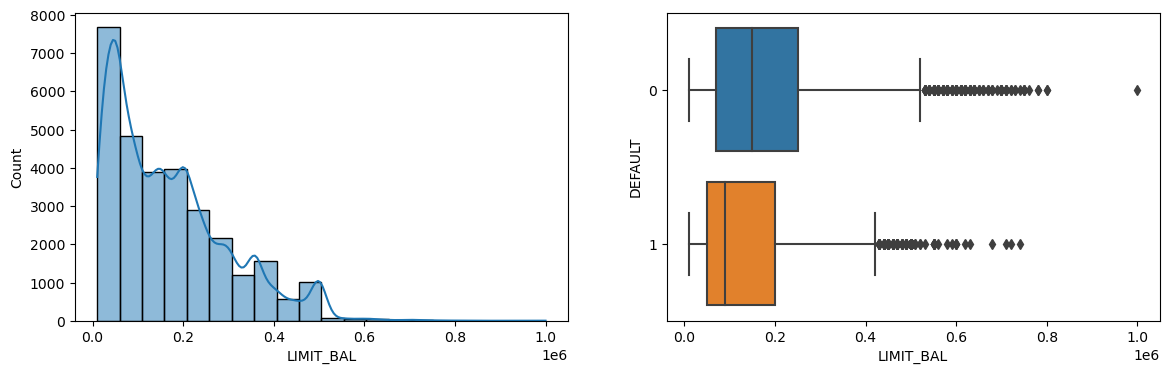

In [39]:
f, axes = plt.subplots(1,2,figsize=(14,4))
sns.histplot(x=df["LIMIT_BAL"], kde=True, bins=20, ax=axes[0])
sns.boxplot(x=df["LIMIT_BAL"], y=df["DEFAULT"], ax=axes[1])
plt.show()

The distribution for limit balance is also right skewed with outliers.



In [40]:
df1 = df[["LIMIT_BAL","DEFAULT"]]


In [41]:
def outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    return data.clip(upper_bound, lower_bound)

df1["LIMIT_BAL"] = outlier(df1["LIMIT_BAL"])

After addressing outliers,

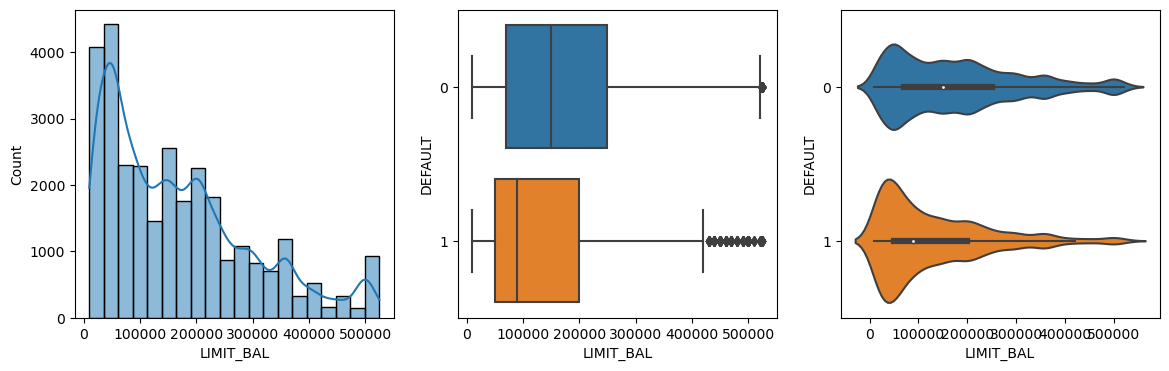

In [42]:
f, axes = plt.subplots(1,3,figsize=(14,4))
sns.histplot(x=df1["LIMIT_BAL"], kde=True, bins=20, ax=axes[0])
sns.boxplot(x=df1["LIMIT_BAL"], y=df1["DEFAULT"], ax=axes[1])
sns.violinplot(x=df1["LIMIT_BAL"], y=df1["DEFAULT"], ax=axes[2])
plt.show()

The mean limit lies below 100000 dollars for clients with defaults.

### Checking for correlations

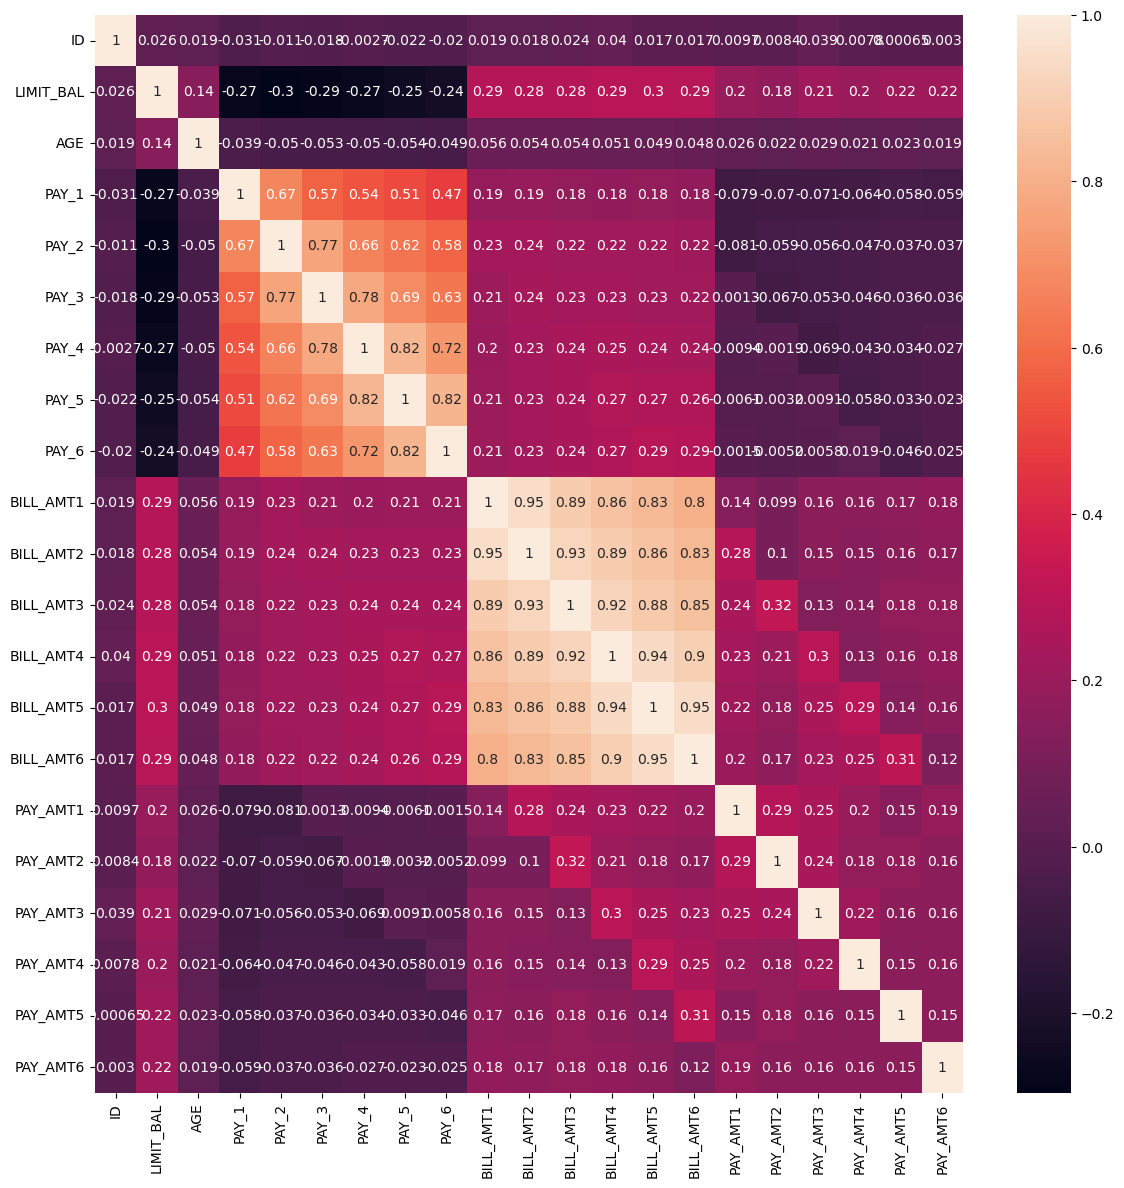

In [43]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)
plt.show()

- There is high correlation amongst the bill amount columns and payment status columns.
- There is a high positive correlation between consecutive bill amounts such as BILL_AMT2 and BILL_AMT1, BILL_AMT_3 and BILL_AMT2 and so on.
- This indicates that if the bill amount for one month increases, the bill amount for next month also increases. 
- This indicates that a client has similar spending pattern every month or that interest for each month is reflected/accumulated in next month.
- A similar high positive correlation is seen amongst payment statuses. However, it reduces from PAY_6 to PAY_1. 
- This indicates that while there may be a high correlation between payment status of April and May, the level of correlation reduces between August and September. The client is more likely to repay later in the year than earlier.
- There is also a low negative correlation between limit balance and payment status indicating that clients with higher defaults have lesser credit limits.

#### General observation about relationship between bill amount, payment amount and payment status

- Bill generated in May = BILL_AMT5. Paid in June = PAY_AMT4.
- If not paid, PAY_5 will be 2. 
- If some amount (probably interest portion) paid, PAY_5 is 0. 
- If full amount paid, PAY_5 is -1. 
- If bill generated is 0 or excess payment done, PAY_5 is -2.
- There is no way to know how much has been paid for bill generated in September i.e BILL_AMT1. Except to see PAY_1 status.
- The Default is for Bill generated in October.


As per earlier observation, defaulters in general are paying less amounts. Which means, they will have more amount remaining as dues. Higher the dues, higher the likelihood of default.

In [44]:
dfc = df.copy()

In [45]:
# Calculating remaining amount after payments

dfc["rem_pay6"]=(df["BILL_AMT6"]-df["PAY_AMT5"])
dfc["rem_pay5"]=(df["BILL_AMT5"]-df["PAY_AMT4"])
dfc["rem_pay4"]=(df["BILL_AMT4"]-df["PAY_AMT3"])
dfc["rem_pay3"]=(df["BILL_AMT3"]-df["PAY_AMT2"])
dfc["rem_pay2"]=(df["BILL_AMT2"]-df["PAY_AMT1"])


In [46]:
#Redundant columns after calculating remaining amount of dues
drop_cols = ['BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6', 'ID']

In [47]:
#Dropping redundant columns
dfc = dfc.drop(columns = drop_cols)


In [48]:
dfc.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,DEFAULT,rem_pay6,rem_pay5,rem_pay4,rem_pay3,rem_pay2
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,1,0.0,0.0,0.0,0.0,3102.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1,3261.0,2455.0,2272.0,1682.0,1725.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,0,14549.0,13948.0,13331.0,12059.0,12509.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,0,28478.0,27859.0,27114.0,47272.0,46233.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,0,18442.0,10146.0,10940.0,-846.0,3670.0


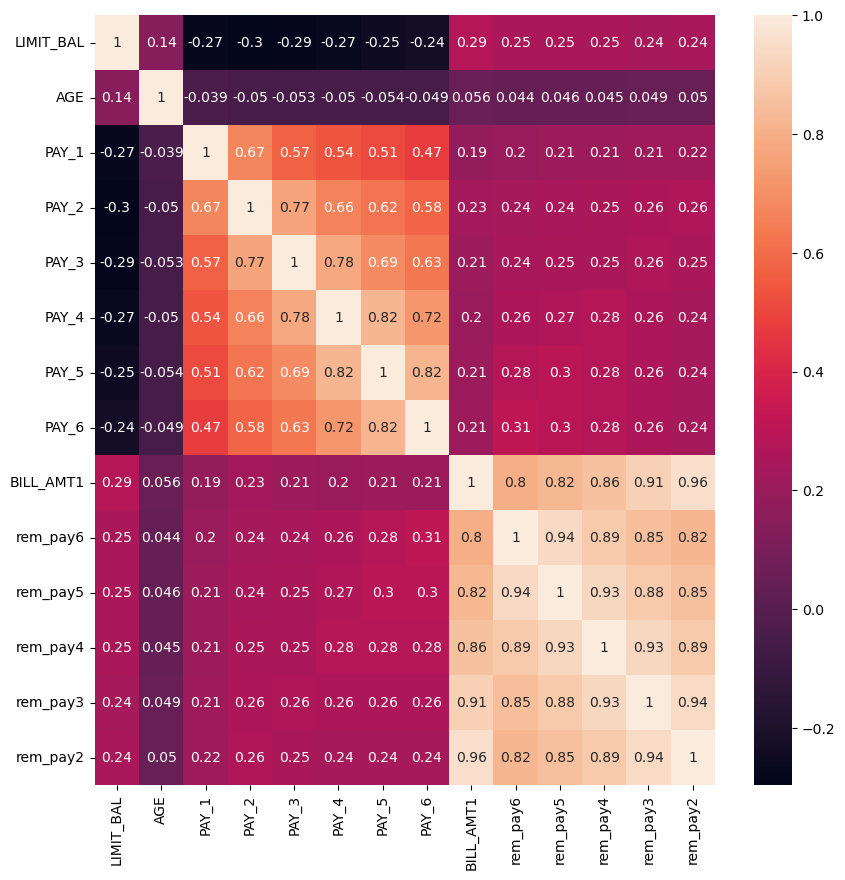

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(dfc.corr(),annot=True)
plt.show()

The multicollinearity has considerably increased. Instead of eliminating features to reduce multicollinearity, we can use tree based models which in general are not affected by it.



### Feature selection using statistical significance techniques

In [50]:
#Separating numerical and categorical columns
c_cols = dfc.select_dtypes(include='category')
n_cols = dfc.select_dtypes(exclude='category')

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [52]:
yt = dfc["DEFAULT"]
xt = n_cols

In [53]:
xt.shape

(30000, 14)

In [54]:
#Statistical significance of numerical features based on categorical outcome
fs = SelectKBest(score_func=f_classif, k='all')
X_selected = fs.fit_transform(n_cols, yt)
print(X_selected.shape)

(30000, 14)


In [55]:
X_selected = pd.DataFrame(X_selected)
X_selected.columns = X_selected.columns.astype(str)

In [56]:
dft = pd.concat([X_selected,c_cols],axis=1)

In [57]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,SEX,EDUCATION,MARRIAGE,DEFAULT
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,0.0,0.0,0.0,0.0,3102.0,2,2,1,1
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,3261.0,2455.0,2272.0,1682.0,1725.0,2,2,2,1
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14549.0,13948.0,13331.0,12059.0,12509.0,2,2,2,0
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,28478.0,27859.0,27114.0,47272.0,46233.0,2,2,1,0
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,18442.0,10146.0,10940.0,-846.0,3670.0,1,2,1,0


In [58]:
for i in range(len(fs.scores_)):
     print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 724.068539
Feature 1: 5.788556
Feature 2: 3537.714970
Feature 3: 2239.169136
Feature 4: 1757.466444
Feature 5: 1476.845967
Feature 6: 1304.591176
Feature 7: 1085.402485
Feature 8: 11.580532
Feature 9: 2.541057
Feature 10: 2.036566
Feature 11: 0.903935
Feature 12: 0.967474
Feature 13: 0.250754


Features with lowest statistical significance are dropped

In [59]:
dft.drop(columns = ["1","9","10","11","12","13"],inplace=True)

### Model Building and Evaluation

#### Standardization


In [60]:
X = dft.drop(columns = ["DEFAULT"])
y = dft["DEFAULT"]

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = scaler.fit_transform(X)

In [62]:
cols = X.columns
X = pd.DataFrame(sc, columns = cols)

#### Finding feature importances

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

In [64]:
fi=rfc.feature_importances_
xc = X.columns

<Axes: >

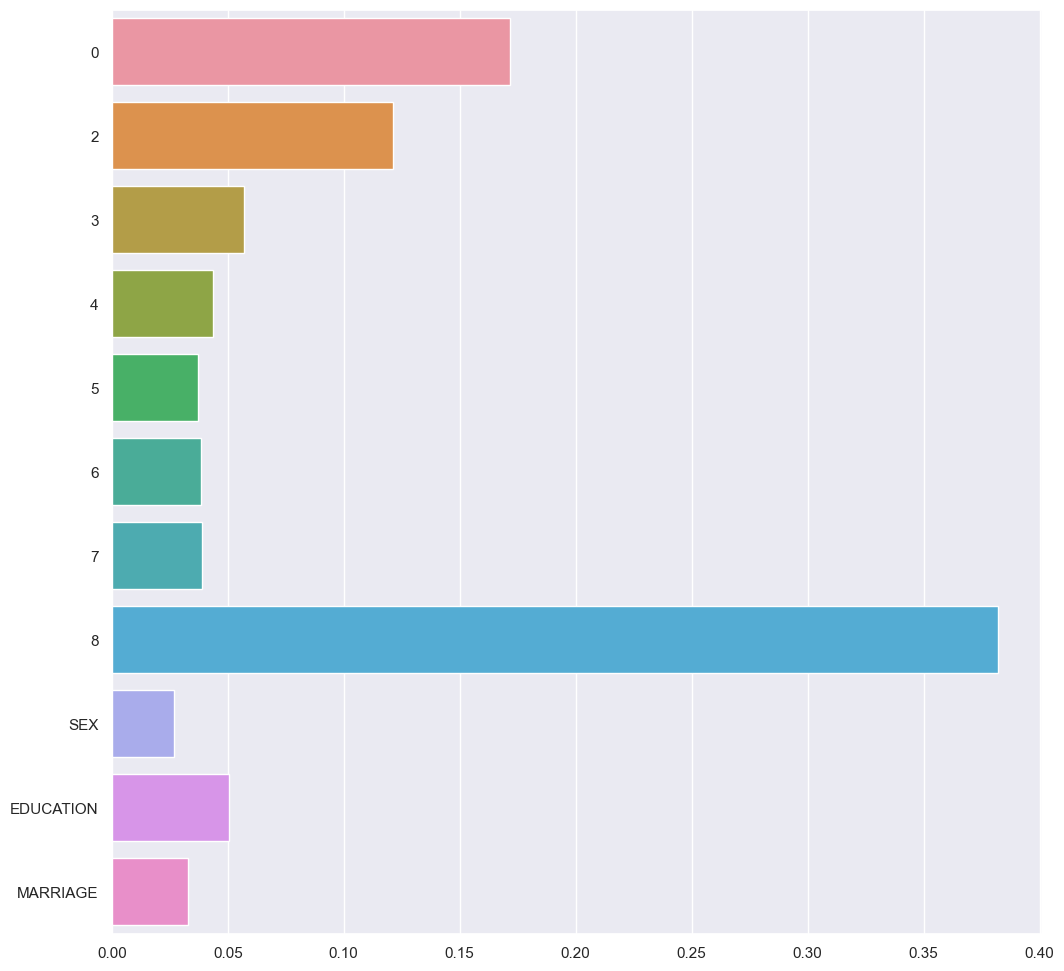

In [65]:
sns.set(rc={"figure.figsize":(12,12)})
sns.barplot(y=xc,x=fi)

In [66]:
# Eliminating less important features
X = X.drop(columns = ["SEX","MARRIAGE"])

#### Splitting data for Training and Testing

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [69]:
X_train

,0,2,3,4,5,6,7,8,EDUCATION
10734,0.444444,0.1,0.1,0.1,0.1,0.1,0.1,0.164174,0.333333
14388,0.040404,0.2,0.2,0.2,0.2,0.2,0.2,0.187050,0.666667
17891,0.090909,0.4,0.2,0.2,0.2,0.2,0.4,0.185039,0.333333
23692,0.080808,0.1,0.1,0.1,0.1,0.1,0.1,0.147546,0.333333
793,0.272727,0.3,0.0,0.0,0.0,0.0,0.0,0.146264,0.666667
...,...,...,...,...,...,...,...,...,...
21633,0.020202,0.2,0.2,0.2,0.2,0.2,0.0,0.168623,1.000000
26265,0.020202,0.3,0.4,0.2,0.2,0.2,0.2,0.170269,0.333333
24555,0.090909,0.2,0.2,0.2,0.2,0.2,0.2,0.227199,0.000000
8124,0.191919,0.4,0.4,0.6,0.6,0.6,0.6,0.148731,0.333333


#### SMOTE resampling on data to address imbalance

In [70]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

#### Models used

- Logistic Regression
- XG Boost Classifier
- Random Forest Classifier
- BernoulliNB
- Gradient Boosting Classifier
- Support Vector Classifier (penalized)

First we will check the best performing model on given data. Then we can address the imbalance using resampling method and check if the results are any better.

#### Logistic Regression

In [71]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')


In [76]:
model_lr = lr.fit(X_train,y_train)
y_pred_test_lr = model_lr.predict(X_test)
y_pred_train = model_lr.predict(X_train)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Metrics for test set")
result_cm = confusion_matrix(y_test, y_pred_test_lr)
print(f"Confusion matrix {model_lr}: \n", result_cm)
result_cr = classification_report(y_test, y_pred_test_lr)
print(f"Classification Report {model_lr}: \n", result_cr)
acc_score = accuracy_score(y_test,y_pred_test_lr)
print(f"Accuracy Score: for {model_lr} \n", acc_score)

print(f"Metrics for training set")
result_cm = confusion_matrix(y_train, y_pred_train)
print(f"Confusion matrix {model_lr}: \n", result_cm)
result_cr = classification_report(y_train, y_pred_train)
print(f"Classification Report {model_lr}: \n", result_cr)
acc_score = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score: for {model_lr} \n", acc_score)

Metrics for test set
Confusion matrix LogisticRegression(solver='liblinear'): 
 [[6814  155]
 [1587  444]]
Classification Report LogisticRegression(solver='liblinear'): 
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      6969
           1       0.74      0.22      0.34      2031

    accuracy                           0.81      9000
   macro avg       0.78      0.60      0.61      9000
weighted avg       0.80      0.81      0.76      9000

Accuracy Score: for LogisticRegression(solver='liblinear') 
 0.8064444444444444
Metrics for training set
Confusion matrix LogisticRegression(solver='liblinear'): 
 [[15992   403]
 [ 3637   968]]
Classification Report LogisticRegression(solver='liblinear'): 
               precision    recall  f1-score   support

           0       0.81      0.98      0.89     16395
           1       0.71      0.21      0.32      4605

    accuracy                           0.81     21000
   macro avg       0.76  

In [78]:
from sklearn.metrics import roc_auc_score
auc_lr = np.round(roc_auc_score(y_test,y_pred_test_lr),3)
auc_lr

0.598

#### XG Boost Classifier

In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [85]:
model_xgb = xgb.fit(X_train,y_train)


In [86]:
y_pred_test_xgb = model_xgb.predict(X_test)
y_pred_train = model_xgb.predict(X_train)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Metrics for test set")
result_cm = confusion_matrix(y_test, y_pred_test_xgb)
print(f"Confusion matrix {model_xgb}: \n", result_cm)
result_cr = classification_report(y_test, y_pred_test_xgb)
print(f"Classification Report {model_xgb}: \n", result_cr)
acc_score_xgb = accuracy_score(y_test,y_pred_test_xgb)
print(f"Accuracy Score: for {model_xgb} \n", acc_score_xgb)

print(f"Metrics for training set")
result_cm = confusion_matrix(y_train, y_pred_train)
print(f"Confusion matrix {model_xgb}: \n", result_cm)
result_cr = classification_report(y_train, y_pred_train)
print(f"Classification Report {model_xgb}: \n", result_cr)
acc_score = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score: for {model_xgb} \n", acc_score)

Metrics for test set
Confusion matrix XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
 [[6582  387]
 [1323  708]]
Classification Report XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree

In [88]:
from sklearn.metrics import roc_auc_score
auc_xgb = np.round(roc_auc_score(y_test,y_pred_test_xgb),3)
auc_xgb

0.647

### Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_rfc = rfc.fit(X_train,y_train)


In [90]:
y_pred_test_rfc = model_rfc.predict(X_test)
y_pred_train = model_rfc.predict(X_train)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Metrics for test set")
result_cm = confusion_matrix(y_test, y_pred_test_rfc)
print(f"Confusion matrix {model_rfc}: \n", result_cm)
result_cr = classification_report(y_test, y_pred_test_rfc)
print(f"Classification Report {model_rfc}: \n", result_cr)
acc_score_rfc = accuracy_score(y_test,y_pred_test_rfc)
print(f"Accuracy Score: for {model_rfc} \n", acc_score_rfc)

print(f"Metrics for training set")
result_cm = confusion_matrix(y_train, y_pred_train)
print(f"Confusion matrix {model_rfc}: \n", result_cm)
result_cr = classification_report(y_train, y_pred_train)
print(f"Classification Report {model_rfc}: \n", result_cr)
acc_score = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score: for {model_rfc} \n", acc_score_rfc)

Metrics for test set
Confusion matrix RandomForestClassifier(): 
 [[6221  748]
 [1273  758]]
Classification Report RandomForestClassifier(): 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      6969
           1       0.50      0.37      0.43      2031

    accuracy                           0.78      9000
   macro avg       0.67      0.63      0.64      9000
weighted avg       0.76      0.78      0.76      9000

Accuracy Score: for RandomForestClassifier() 
 0.7754444444444445
Metrics for training set
Confusion matrix RandomForestClassifier(): 
 [[16331    64]
 [  176  4429]]
Classification Report RandomForestClassifier(): 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     16395
           1       0.99      0.96      0.97      4605

    accuracy                           0.99     21000
   macro avg       0.99      0.98      0.98     21000
weighted avg       0.99      0.99      0.

In [92]:
from sklearn.metrics import roc_auc_score
auc_rfc = np.round(roc_auc_score(y_test,y_pred_test_rfc),3)
auc_rfc

0.633

### BernoulliNB

In [93]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()

In [94]:
model_nb = nb.fit(X_train,y_train)


In [95]:
y_pred_test_nb = model_nb.predict(X_test)
y_pred_train = model_nb.predict(X_train)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Metrics for test set")
result_cm = confusion_matrix(y_test, y_pred_test_nb)
print(f"Confusion matrix {model_nb}: \n", result_cm)
result_cr = classification_report(y_test, y_pred_test_nb)
print(f"Classification Report {model_nb}: \n", result_cr)
acc_score_nb = accuracy_score(y_test,y_pred_test_nb)
print(f"Accuracy Score: for {model_nb} \n", acc_score_nb)

print(f"Metrics for training set")
result_cm = confusion_matrix(y_train, y_pred_train)
print(f"Confusion matrix {model_nb}: \n", result_cm)
result_cr = classification_report(y_train, y_pred_train)
print(f"Classification Report {model_nb}: \n", result_cr)
acc_score = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score: for {model_nb} \n", acc_score)

Metrics for test set
Confusion matrix BernoulliNB(): 
 [[6969    0]
 [2031    0]]
Classification Report BernoulliNB(): 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      6969
           1       0.00      0.00      0.00      2031

    accuracy                           0.77      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.77      0.68      9000

Accuracy Score: for BernoulliNB() 
 0.7743333333333333
Metrics for training set
Confusion matrix BernoulliNB(): 
 [[16395     0]
 [ 4605     0]]
Classification Report BernoulliNB(): 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     16395
           1       0.00      0.00      0.00      4605

    accuracy                           0.78     21000
   macro avg       0.39      0.50      0.44     21000
weighted avg       0.61      0.78      0.68     21000

Accuracy Score: for BernoulliNB() 
 0.780

In [97]:
from sklearn.metrics import roc_auc_score
auc_nb = np.round(roc_auc_score(y_test,y_pred_test_nb),3)
auc_nb

0.5

### Gradient Boosting Classifier

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [99]:
model_gbc = gbc.fit(X_train,y_train)

In [100]:
y_pred_test_gbc = model_gbc.predict(X_test)
y_pred_train = model_gbc.predict(X_train)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Metrics for test set")
result_cm = confusion_matrix(y_test, y_pred_test_gbc)
print(f"Confusion matrix {model_gbc}: \n", result_cm)
result_cr = classification_report(y_test, y_pred_test_gbc)
print(f"Classification Report {model_gbc}: \n", result_cr)
acc_score_gbc = accuracy_score(y_test,y_pred_test_gbc)
print(f"Accuracy Score: for {model_gbc} \n", acc_score_gbc)

print(f"Metrics for training set")
result_cm = confusion_matrix(y_train, y_pred_train)
print(f"Confusion matrix {model_gbc}: \n", result_cm)
result_cr = classification_report(y_train, y_pred_train)
print(f"Classification Report {model_gbc}: \n", result_cr)
acc_score = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score: for {model_gbc} \n", acc_score)

Metrics for test set
Confusion matrix GradientBoostingClassifier(): 
 [[6637  332]
 [1288  743]]
Classification Report GradientBoostingClassifier(): 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      6969
           1       0.69      0.37      0.48      2031

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

Accuracy Score: for GradientBoostingClassifier() 
 0.82
Metrics for training set
Confusion matrix GradientBoostingClassifier(): 
 [[15625   770]
 [ 2863  1742]]
Classification Report GradientBoostingClassifier(): 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     16395
           1       0.69      0.38      0.49      4605

    accuracy                           0.83     21000
   macro avg       0.77      0.67      0.69     21000
weighted avg       0.81      0.83  

In [102]:
from sklearn.metrics import roc_auc_score
auc_gbc = np.round(roc_auc_score(y_test,y_pred_test_gbc),3)
auc_gbc

0.659

### Support Vector Classifier

In [103]:
from sklearn.svm import SVC
# we can add class_weight='balanced' to add penalize mistake
model_svc = SVC(class_weight='balanced', probability=True)
model_svc.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True)

In [104]:
y_pred_test_svc = model_svc.predict(X_test)
y_pred_train = model_svc.predict(X_train)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Metrics for test set")
result_cm = confusion_matrix(y_test, y_pred_test_svc)
print(f"Confusion matrix {model_svc}: \n", result_cm)
result_cr = classification_report(y_test, y_pred_test_svc)
print(f"Classification Report {model_svc}: \n", result_cr)
acc_score_svc = accuracy_score(y_test,y_pred_test_svc)
print(f"Accuracy Score: for {model_svc} \n", acc_score_svc)

print(f"Metrics for training set")
result_cm = confusion_matrix(y_train, y_pred_train)
print(f"Confusion matrix {model_svc}: \n", result_cm)
result_cr = classification_report(y_train, y_pred_train)
print(f"Classification Report {model_svc}: \n", result_cr)
acc_score = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score: for {model_svc} \n", acc_score)

Metrics for test set
Confusion matrix SVC(class_weight='balanced', probability=True): 
 [[5761 1208]
 [ 865 1166]]
Classification Report SVC(class_weight='balanced', probability=True): 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      6969
           1       0.49      0.57      0.53      2031

    accuracy                           0.77      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.78      0.77      0.78      9000

Accuracy Score: for SVC(class_weight='balanced', probability=True) 
 0.7696666666666667
Metrics for training set
Confusion matrix SVC(class_weight='balanced', probability=True): 
 [[13651  2744]
 [ 1844  2761]]
Classification Report SVC(class_weight='balanced', probability=True): 
               precision    recall  f1-score   support

           0       0.88      0.83      0.86     16395
           1       0.50      0.60      0.55      4605

    accuracy                           

In [106]:
from sklearn.metrics import roc_auc_score
auc_svc = np.round(roc_auc_score(y_test,y_pred_test_svc),3)
auc_svc

0.7

#### GBC using SMOTE resampling

In [107]:
model_gbc_s = gbc.fit(X_train_s,y_train_s)
y_pred_test_s = model_gbc_s.predict(X_test)
y_pred_train_s = model_gbc_s.predict(X_train_s)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Metrics for test set")
result_cm = confusion_matrix(y_test, y_pred_test_s)
print(f"Confusion matrix {model_gbc}: \n", result_cm)
result_cr = classification_report(y_test, y_pred_test_s)
print(f"Classification Report {model_gbc}: \n", result_cr)
acc_score_s = accuracy_score(y_test,y_pred_test_s)
print(f"Accuracy Score: for {model_gbc} \n", acc_score_s)

print(f"Metrics for training set")
result_cm = confusion_matrix(y_train_s, y_pred_train_s)
print(f"Confusion matrix {model_gbc}: \n", result_cm)
result_cr = classification_report(y_train_s, y_pred_train_s)
print(f"Classification Report {model_gbc}: \n", result_cr)
acc_score = accuracy_score(y_train_s,y_pred_train_s)
print(f"Accuracy Score: for {model_gbc} \n", acc_score)

Metrics for test set
Confusion matrix GradientBoostingClassifier(): 
 [[5937 1032]
 [ 937 1094]]
Classification Report GradientBoostingClassifier(): 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      6969
           1       0.51      0.54      0.53      2031

    accuracy                           0.78      9000
   macro avg       0.69      0.70      0.69      9000
weighted avg       0.78      0.78      0.78      9000

Accuracy Score: for GradientBoostingClassifier() 
 0.7812222222222223
Metrics for training set
Confusion matrix GradientBoostingClassifier(): 
 [[14139  2256]
 [ 5617 10778]]
Classification Report GradientBoostingClassifier(): 
               precision    recall  f1-score   support

           0       0.72      0.86      0.78     16395
           1       0.83      0.66      0.73     16395

    accuracy                           0.76     32790
   macro avg       0.77      0.76      0.76     32790
weighted avg       0.

In [109]:
from sklearn.metrics import roc_auc_score, precision_recall_curve
auc_s = np.round(roc_auc_score(y_test,y_pred_test_s),3)
auc_s

0.695

Gradient Boosting Classifier has performed much better using SMOTE resampling technique.

### VIsualizing the Area Under Curve and Accuracy score for all the models 

In [110]:
acc = [acc_score,acc_score_xgb,acc_score_rfc,acc_score_nb,acc_score_gbc, acc_score_s,acc_score_svc]
m = ["LogisticReg","XGB","Random forest","BernoulliNB","GBC","GBC with SMOTE","SVC"]

Text(0.5, 1.0, 'Area Under Curve')

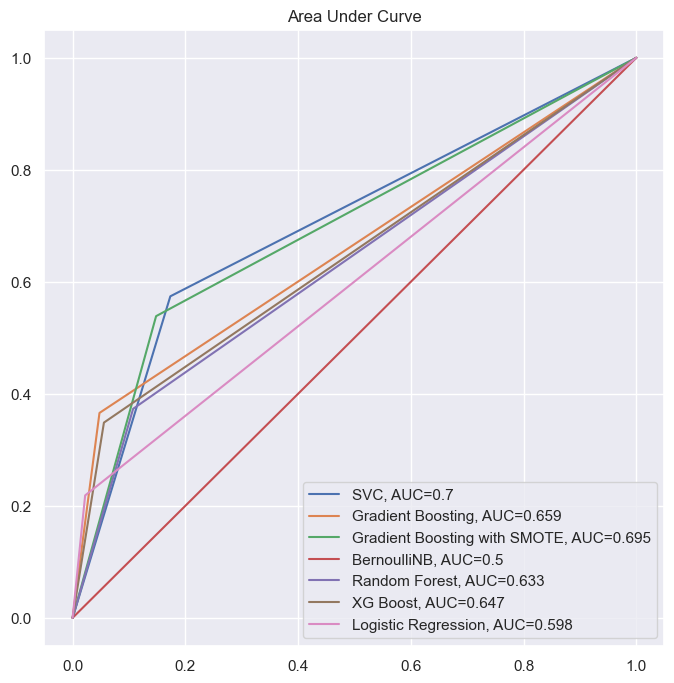

In [111]:
from sklearn import metrics
plt.figure(figsize=(8,8))
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_svc)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc_svc))
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_gbc)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc_gbc))
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_s)
plt.plot(fpr,tpr,label="Gradient Boosting with SMOTE, AUC="+str(auc_s))
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_nb)
plt.plot(fpr,tpr,label="BernoulliNB, AUC="+str(auc_nb))
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_rfc)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc_rfc))
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_xgb)
plt.plot(fpr,tpr,label="XG Boost, AUC="+str(auc_xgb))
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_lr)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc_lr))
plt.legend()
plt.title("Area Under Curve")



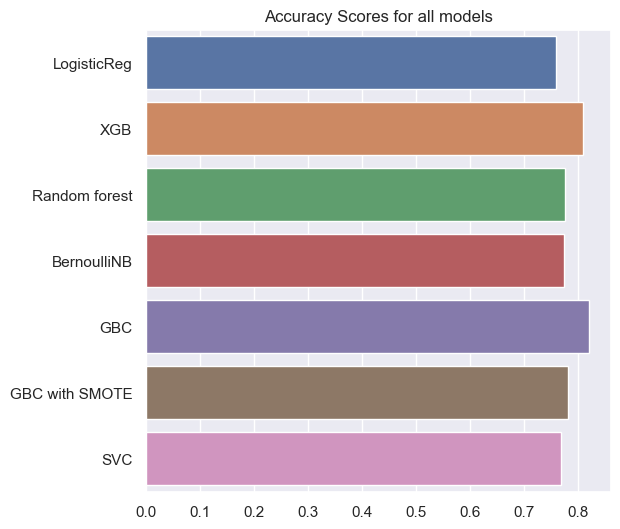

In [112]:
plt.figure(figsize=(6,6))
sns.barplot(x=acc,y=m)
plt.title("Accuracy Scores for all models")
plt.show()

### Conclusion

- It may be concluded that out of all the models that were tested, SVC has performed the best.
- The best AUC score achieved so far is by SVC of 0.7 indicating that the model is 70% capable of correctly classifying between positive and negative outcomes. However, it has a lower accuracy score compared to other models.
- While the accuracy scores are high, the precision, recall, f1-scores and AUC scores are still low to average indicating that the models are struggling to correctly classify between positive and negative outcomes. An AUC score closer to 1 is always preferable. 
- There is an imbalance in the dataset which was addressed through SMOTE sampling technique on Gradient Boosting Classifier. This improved the AUC score but it did not cross the AUC score of SVC model. 
